**ML Model**

## Various Graph has been generated through Real-Data gathered through various Research-Paper, websites and csv files  

Top 5 Recommended Warehouse Locations:
     Location  Latitude  Longitude  Population
16  Chinchwad   18.6298    73.8121      300000
15     Pimpri   18.6186    73.8037      250000
8    Hadapsar   18.5074    73.9254      200000
17    Yerwada   18.5642    73.8875      180000
7     Kharadi   18.5518    73.9400      150000


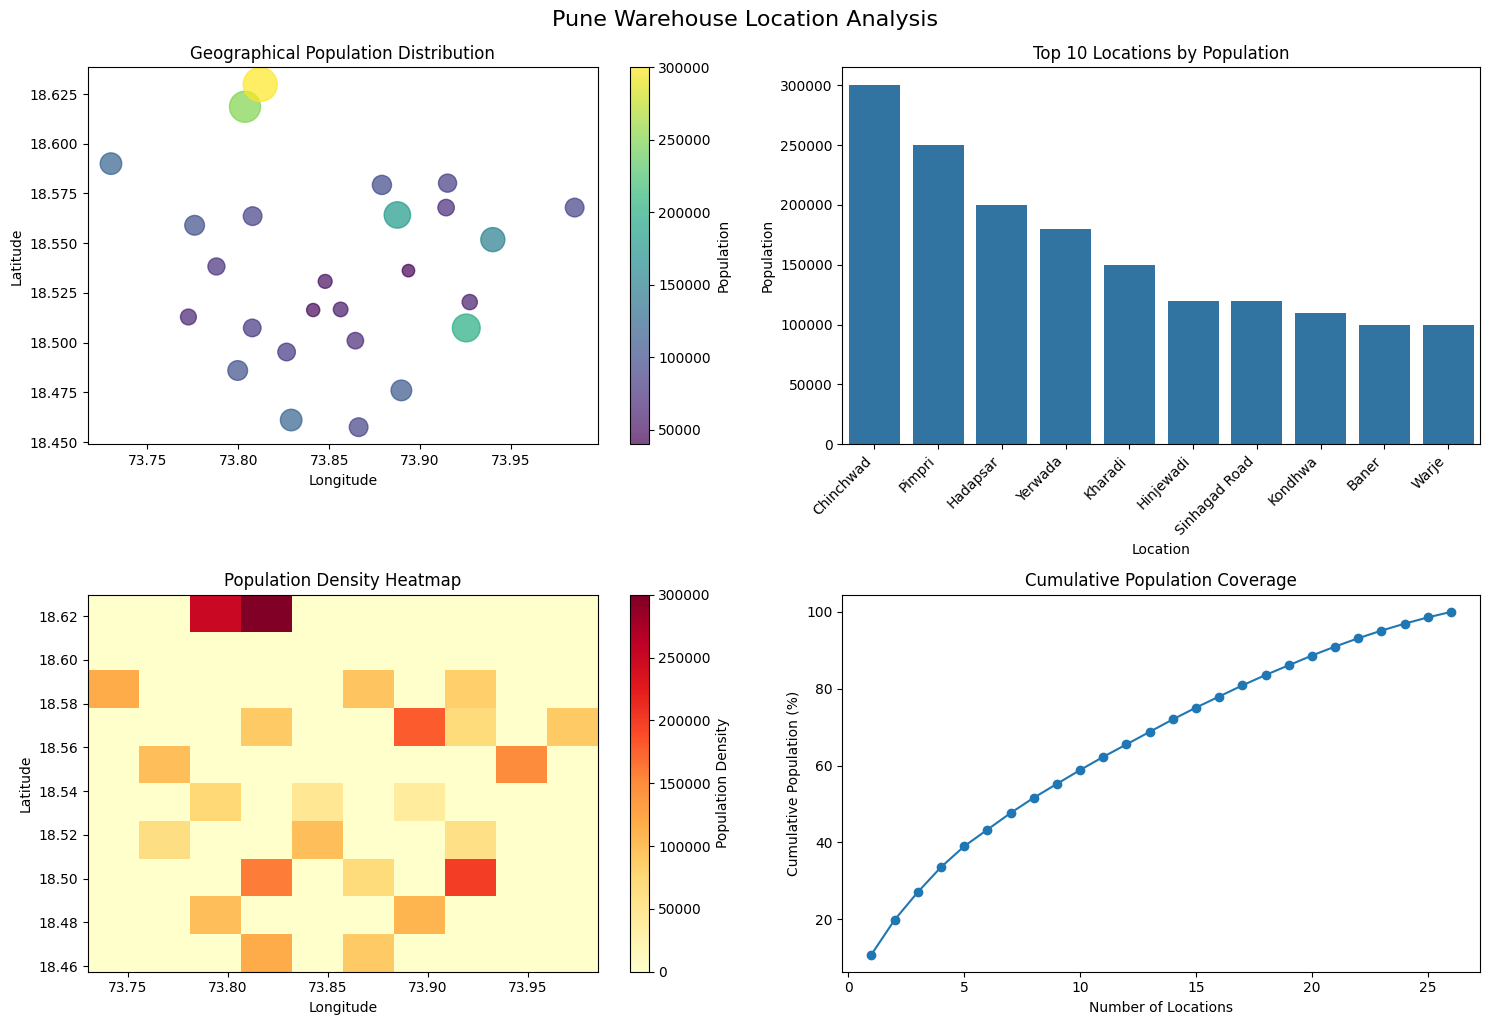

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('C:\\Users\\dhruv\\OneDrive\\Desktop\\Pune_Population_Data.csv')

# Create a comprehensive visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Bubble Chart of Locations
plt.subplot(2, 2, 1)
plt.scatter(df['Longitude'], df['Latitude'], 
            s=df['Population']/500,  # Size proportional to population
            c=df['Population'], 
            cmap='viridis', 
            alpha=0.7)
plt.colorbar(label='Population')
plt.title('Geographical Population Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Subplot 2: Top 10 Locations by Population
plt.subplot(2, 2, 2)
top_10_locations = df.nlargest(10, 'Population')
sns.barplot(x='Location', y='Population', data=top_10_locations)
plt.title('Top 10 Locations by Population')
plt.xticks(rotation=45, ha='right')

# Subplot 3: Population Density Heatmap
plt.subplot(2, 2, 3)
plt.hist2d(df['Longitude'], df['Latitude'], 
           weights=df['Population'], 
           bins=10, 
           cmap='YlOrRd')
plt.colorbar(label='Population Density')
plt.title('Population Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Subplot 4: Cumulative Population Coverage
plt.subplot(2, 2, 4)
sorted_locations = df.sort_values('Population', ascending=False)
sorted_locations['Cumulative_Population'] = sorted_locations['Population'].cumsum()
sorted_locations['Cumulative_Percentage'] = sorted_locations['Cumulative_Population'] / sorted_locations['Population'].sum() * 100
plt.plot(range(1, len(sorted_locations) + 1), 
         sorted_locations['Cumulative_Percentage'], 
         marker='o')
plt.title('Cumulative Population Coverage')
plt.xlabel('Number of Locations')
plt.ylabel('Cumulative Population (%)')

plt.tight_layout()
plt.suptitle('Pune Warehouse Location Analysis', fontsize=16, y=1.02)
plt.savefig('warehouse_location_analysis.png', bbox_inches='tight', dpi=300)

# Print top locations for warehouse placement
print("Top 5 Recommended Warehouse Locations:")
top_locations = df.nlargest(5, 'Population')
print(top_locations[['Location', 'Latitude', 'Longitude', 'Population']])

**Various garph(scatter, Bar-graph, Heatmap, Line-graph )is generated for proper Data-Analysis of population in pune**

## ML model by using k-means Clustering and various optimal parameters

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22340\4193160762.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  warehouse_locations = df.groupby('Cluster').apply(



Recommended Warehouse Locations:
    Location  Latitude  Longitude  Population
0   Hadapsar   18.5074    73.9254      200000
1  Chinchwad   18.6298    73.8121      300000
2  Hinjewadi   18.5900    73.7300      120000
3    Yerwada   18.5642    73.8875      180000


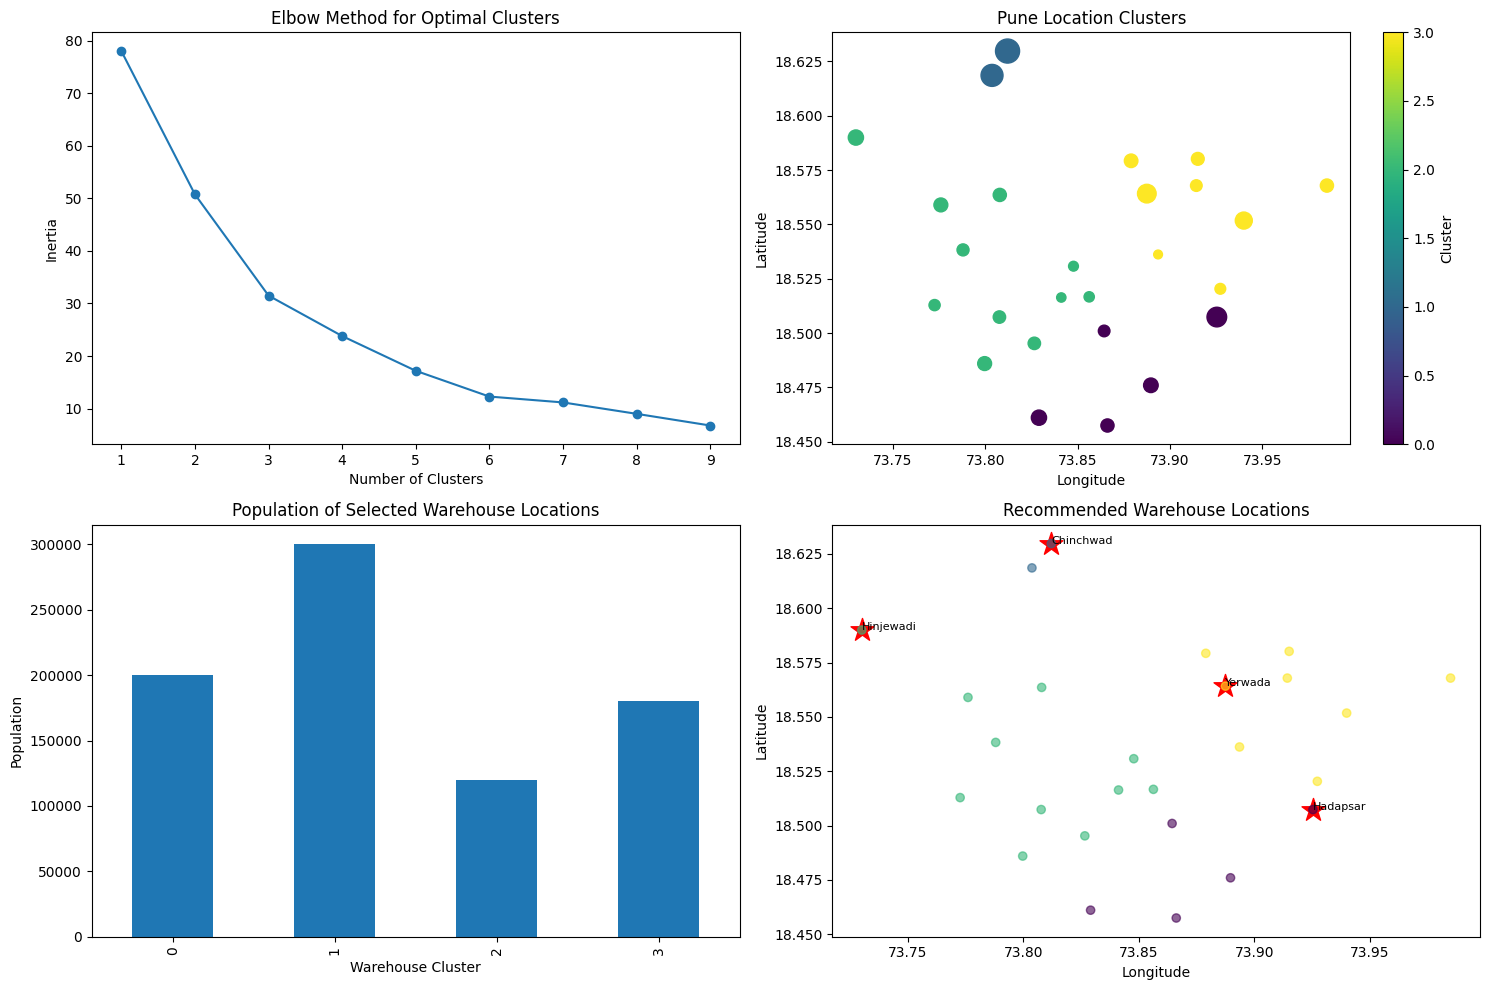

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def optimize_warehouse_locations(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Prepare data for clustering
    X = df[['Latitude', 'Longitude', 'Population']].copy()
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Determine optimal number of clusters using elbow method
    inertias = []
    max_clusters = min(10, len(df))
    
    for k in range(1, max_clusters):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    
    # Perform K-Means clustering
    # Use 3-5 clusters based on elbow method
    optimal_clusters = 4  # You can adjust this based on the elbow plot
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X_scaled)
    
    # Find best warehouse locations (highest population in each cluster)
    warehouse_locations = df.groupby('Cluster').apply(
        lambda x: x.loc[x['Population'].idxmax()]
    ).reset_index(drop=True)
    
    # Visualization
    plt.figure(figsize=(15, 10))
    
    # Subplot 1: Elbow Method
    plt.subplot(2, 2, 1)
    plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    
    # Subplot 2: Scatter plot of locations with clusters
    plt.subplot(2, 2, 2)
    scatter = plt.scatter(df['Longitude'], df['Latitude'], 
                          c=df['Cluster'], 
                          cmap='viridis', 
                          s=df['Population']/1000)
    plt.title('Pune Location Clusters')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.colorbar(scatter, label='Cluster')
    
    # Subplot 3: Population Distribution
    plt.subplot(2, 2, 3)
    warehouse_locations['Population'].plot(kind='bar')
    plt.title('Population of Selected Warehouse Locations')
    plt.xlabel('Warehouse Cluster')
    plt.ylabel('Population')
    
    # Subplot 4: Warehouse Locations
    plt.subplot(2, 2, 4)
    for _, location in warehouse_locations.iterrows():
        plt.scatter(location['Longitude'], location['Latitude'], 
                    color='red', s=300, marker='*')
        plt.text(location['Longitude'], location['Latitude'], 
                 location['Location'], fontsize=8)
    
    plt.scatter(df['Longitude'], df['Latitude'], 
                c=df['Cluster'], cmap='viridis', alpha=0.6)
    plt.title('Recommended Warehouse Locations')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    plt.tight_layout()
    plt.savefig('pune_warehouse_analysis.png')
    
    # Print warehouse locations
    print("\nRecommended Warehouse Locations:")
    print(warehouse_locations[['Location', 'Latitude', 'Longitude', 'Population']])
    
    return warehouse_locations

# Main execution
def main():
    warehouse_locations = optimize_warehouse_locations('C:\\Users\\dhruv\\OneDrive\\Desktop\\Pune_Population_Data.csv')

if __name__ == "__main__":
    main()

**In 3rd Bar-Graph it is shown the population rate where the selected warhouse are located**

**In last Scatter plot the best recommended warehouse location are displayed for better access to people according to market-research**

**Why these warehouse location are recommended ?  
1.Cost Effecient  
2.Fast Delivery(Traffic Tackling)  
3.Social Event Friendly  
4.Maximum effeciency and customer reach**